In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.dpi":1200})
sns.set_context('notebook')
sns.set_style("ticks")
mpl.style.use('default')
mpl.rcParams['axes.linewidth'] = 7 #set the value globally
mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 7
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 7
mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 7
mpl.rcParams['ytick.labelsize'] = 50
mpl.rcParams['xtick.labelsize'] = 50
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 7
mpl.rcParams['font.size'] = 55
mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams['mathtext.it'] = 'Arial'
mpl.rcParams['mathtext.bf'] = 'Arial:bold'

In [2]:
###IMPORT DATAFRAME###
df = pd.read_csv('OSMOTIC_PERTURBATIONS_MASTER_HIF1A_CITED2_CONCATENATED.csv')
###Drop any rows where 'protein' is 'HIF1A'####
df = df[df['protein'] != 'HIF1A']###

df = df[df['D/A_corr_before']<6]
df = df[df['area_before']<650]
df = df[df['D_before']>500]
df = df[df['directA_before']<10000]
df = df[df['directA_before']>3162]
df = df[(df['d_directA']<1200)]
# Group by 'ID' and get 'well' value counts for each group
grouped_well_counts = df.groupby('IDR')['well'].value_counts()

# Convert the Series to a DataFrame for easier filtering
grouped_well_counts = grouped_well_counts.reset_index(name='count')

# Identify 'ID' and 'well' pairs with a count of 30 or more
valid_wells = grouped_well_counts[grouped_well_counts['count'] >= 30]

# Merge the valid_wells DataFrame back with the original df to filter it
# Only keep rows from df that have 'ID' and 'well' combinations appearing in valid_wells
df_filtered = df.merge(valid_wells[['IDR', 'well']], on=['IDR', 'well'])

# The df_filtered now contains only the rows from the original df where the 'well' count per 'ID' is 30 or more
df=df_filtered
# TableS3 = TableS3[TableS3['D/A_before']<6]
# TableS3 = TableS3[TableS3['Area']<650]
# TableS3 = TableS3[TableS3['ch1']>3000]
# TableS3 = TableS3[TableS3['ch3']<10000]
# sliced = TableS3[(TableS3.construct==prot)&(abs(TableS3['ch7']-TableS3['ch3'])<2000)]

In [3]:
# Calculate median 'delta Ef' for each 'replicate' of each 'condition' for each 'mut name'
df_median = df.groupby(['mut name', 'condition', 'well'])['delta Ef'].median().reset_index()

# Rename 'delta Ef' column to 'median delta Ef'
df_median.rename(columns={'delta Ef': 'median delta Ef'}, inplace=True)

# Calculate standard deviation of 'median delta Ef' for each 'condition' for each 'mut name'
df_std = df_median.groupby(['mut name', 'condition'])['median delta Ef'].std().reset_index()

# Rename 'median delta Ef' column to 'std dev delta Ef'
df_std.rename(columns={'median delta Ef': 'std dev delta Ef'}, inplace=True)

# Merge df_median and df_std
df_final = pd.merge(df_median, df_std, on=['mut name', 'condition'], how='left')

# Print the final DataFrame
#print(df_final)

# Calculate average 'median delta Ef' for each 'condition' for each 'mut name'
df_mean = df_final.groupby(['mut name', 'condition'])['median delta Ef'].mean().reset_index()

# Rename 'median delta Ef' column to 'average median delta Ef'
df_mean.rename(columns={'median delta Ef': 'average median delta Ef'}, inplace=True)

# Calculate standard deviation of 'average median delta Ef' for each 'condition' for each 'mut name'
df_std = df_final.groupby(['mut name', 'condition'])['median delta Ef'].std().reset_index()

# Rename 'median delta Ef' column to 'std dev average median delta Ef'
df_std.rename(columns={'median delta Ef': 'std dev average median delta Ef'}, inplace=True)

# Merge df_mean and df_std
df_final_avg = pd.merge(df_mean, df_std, on=['mut name', 'condition'], how='left')

# Print the final DataFrame
print(df_final_avg)
df_final_avg

         mut name  condition  average median delta Ef  \
0           FML>A        300                -0.004698   
1           FML>A        750                 0.008240   
2            GS24        100                -0.001024   
3            GS24        300                -0.001496   
4            GS24        750                 0.020948   
5             L>F        100                 0.014795   
6             L>F        300                -0.003635   
7             L>F        750                -0.025949   
8             L>W        300                 0.000069   
9             L>W        750                -0.048538   
10  RK>Amut20to39        100                 0.019484   
11  RK>Amut20to39        300                -0.001419   
12  RK>Amut20to39        750                -0.023542   
13           RK>E        100                 0.020869   
14           RK>E        300                -0.000831   
15           RK>E        750                -0.038498   
16             WT        100   

,mut name,condition,average median delta Ef,std dev average median delta Ef
0,FML>A,300,-0.004698,NaN
1,FML>A,750,0.008240,NaN
2,GS24,100,-0.001024,0.005746
3,GS24,300,-0.001496,0.001153
4,GS24,750,0.020948,0.008188
5,L>F,100,0.014795,0.005346
6,L>F,300,-0.003635,0.003174
7,L>F,750,-0.025949,0.009302
8,L>W,300,0.000069,NaN
9,L>W,750,-0.048538,NaN


In [4]:
# Filter df_final_avg for 'condition' 750 and 100
df_750 = df_final_avg[df_final_avg['condition'] == 750]
df_100 = df_final_avg[df_final_avg['condition'] == 100]

# Set 'mut name' as the index for easy subtraction
df_750.set_index('mut name', inplace=True)
df_100.set_index('mut name', inplace=True)

##says df_diff but it's actually the sum for total sensitivity
df_diff = (df_750['average median delta Ef']).abs() + (df_100['average median delta Ef']).abs()

# Calculate the propagated standard error
df_error = (df_750['std dev average median delta Ef']**2 + df_100['std dev average median delta Ef']**2)**0.5

# Create the sensitivity DataFrame
sensitivity = pd.DataFrame({'absolute difference': df_diff, 'propagated_SE': df_error})

# Reset the index
sensitivity.reset_index(inplace=True)

# Print the sensitivity DataFrame
print(sensitivity)


        mut name  absolute difference  propagated_SE
0          FML>A                  NaN            NaN
1           GS24             0.021972       0.010003
2            L>F             0.040743       0.010729
3            L>W                  NaN            NaN
4  RK>Amut20to39             0.043026       0.009719
5           RK>E             0.059366            NaN
6             WT             0.057625       0.008829


In [9]:
# Add '_HIF1A' after each 'mut name', except for 'GS24'
sensitivity['mut name'] = sensitivity['mut name'].apply(lambda x: x + '_CITED2' if x != 'GS24' else x)


# Save the updated DataFrame to a CSV file
sensitivity.to_csv('CITED2_sensitivity.csv', index=False)

# Display the updated DataFrame
print(sensitivity)

               mut name  absolute difference  propagated_SE
0          FML>A_CITED2                  NaN            NaN
1            L>F_CITED2             0.040743       0.010729
2            L>W_CITED2                  NaN            NaN
3             WT_CITED2             0.057625       0.008829
4           RK>E_CITED2             0.059366            NaN
5  RK>Amut20to39_CITED2             0.043026       0.009719


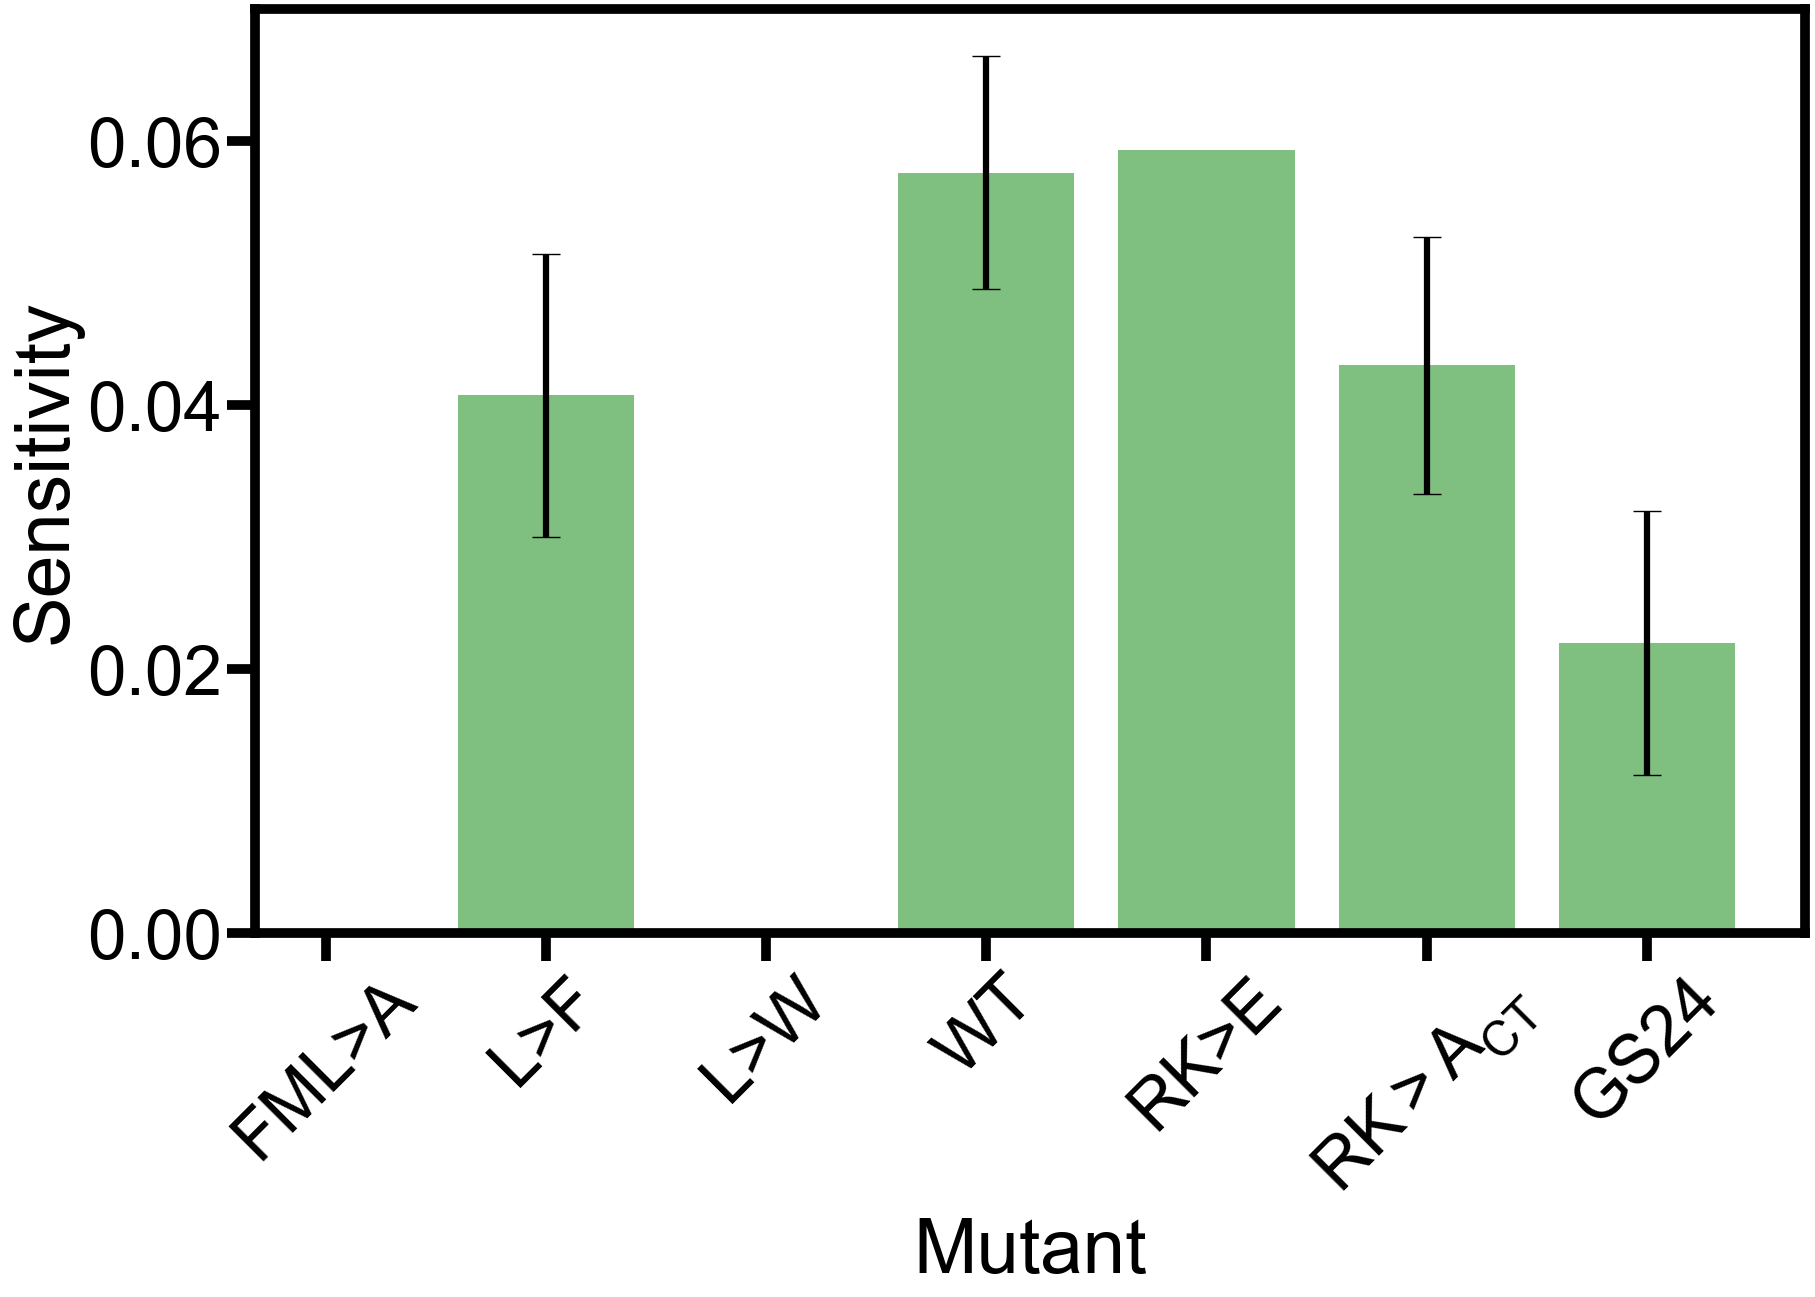

In [5]:
# Define your desired order
order = ['FML>A', 'L>F', 'L>W', 'WT', 'RK>E', 'RK>Amut20to39', 'GS24']

# Reorder the dataframe according to the desired order
sensitivity = sensitivity.set_index('mut name').loc[order].reset_index()

# Create a figure and a subplots axis
fig, ax = plt.subplots(figsize=(20,12))

# Generate the bar plot with error bars
ax.bar(sensitivity['mut name'], sensitivity['absolute difference'], 
       yerr=sensitivity['propagated_SE'], align='center', alpha=0.5,color='green', ecolor='black', capsize=10,error_kw={'elinewidth':4.5})

# Prepare to update x-axis labels
labels = [label.get_text() if label.get_text() != 'RK>Amut20to39' else 'RK$>A_{CT}$' for label in ax.get_xticklabels()]

# Set updated labels
ax.set_xticklabels(labels, rotation=45)  # Set rotation to 45 degrees for better label visibility
ax.set_ylim(bottom=0, top=0.07)  # Replace 'your_upper_limit' with the maximum value you want for the y-axis.

plt.xlabel('Mutant')
plt.ylabel('Sensitivity')


# Display the plot
plt.show()


In [6]:
##IMPORT ACTIVITY
activity = pd.read_csv('Shahar_ADvariants_20211203.csv')
activity = activity[activity['ID'].isin([7,8,9,10,11,12])]
activity = activity.drop(columns=['norm_error','start','end'])
activity= activity.rename(columns={'MutName': 'mut name'})
activity['Activity_Mean_MSS18'] = activity['Activity_Mean_MSS18'] - 2000
activity.loc[activity['Activity_Mean_MSS18'] < 0, 'Activity_Mean_MSS18'] = 0

wt_value = activity.loc[activity['mut name'] == 'WT', 'Activity_Mean_MSS18'].iloc[0]

# Create a new column 'normalized activity' by dividing 'Activity_Mean_MSS18' by the WT value
activity['normalized activity'] = activity['Activity_Mean_MSS18'] / wt_value
# Find the standard deviation value for the 'WT' mut name
wt_std = activity[activity['mut name'] == 'WT']['Activity_std_MSS18'].iloc[0]

# Calculate the normalized error
activity['normalized error'] = ((activity['Activity_std_MSS18'] / activity['Activity_Mean_MSS18'])**2 + 
                                (wt_std / wt_value)**2)**0.5 * activity['normalized activity']
# Replace 'killmotif1' with 'FML>A' in the 'mut name' column
activity['mut name'] = activity['mut name'].replace('killmotif1', 'FML>A')


activity

,ID,Gene,ADseq,Activity_Mean_MSS18,Activity_std_MSS18,mut name,normalized activity,normalized error
6,7,CITED2,TDAIDEEVAMSAVIEMGLDRIKELPELWLGQNEFDFMTD,0.000000,510.069751,FML>A,0.000000,NaN
7,8,CITED2,TDFIDEEVFMSFVIEMGFDRIKEFPEFWFGQNEFDFMTD,81.676282,263.574796,L>F,0.031015,0.100570
8,9,CITED2,TDFIDEEVWMSWVIEMGWDRIKEWPEWWWGQNEFDFMTD,317.262431,300.576006,L>W,0.120474,0.120370
9,10,CITED2,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTD,2633.448213,835.652083,WT,1.000000,0.448762
10,11,CITED2,TDFIDEEVLMSLVIEMGLDEIEELPELWLGQNEFDFMTD,3096.616988,896.112121,RK>E,1.175879,0.504994
11,12,CITED2,TDFIDEEVLMSLVIEMGLDRIAELPELWLGQNEFDFMTD,3659.066247,1336.982271,RK>Amut20to39,1.389458,0.672421


In [7]:
sensitivity = sensitivity[sensitivity['mut name'] != 'GS24']
sensitivity

,mut name,absolute difference,propagated_SE
0,FML>A,NaN,NaN
1,L>F,0.040743,0.010729
2,L>W,NaN,NaN
3,WT,0.057625,0.008829
4,RK>E,0.059366,NaN
5,RK>Amut20to39,0.043026,0.009719


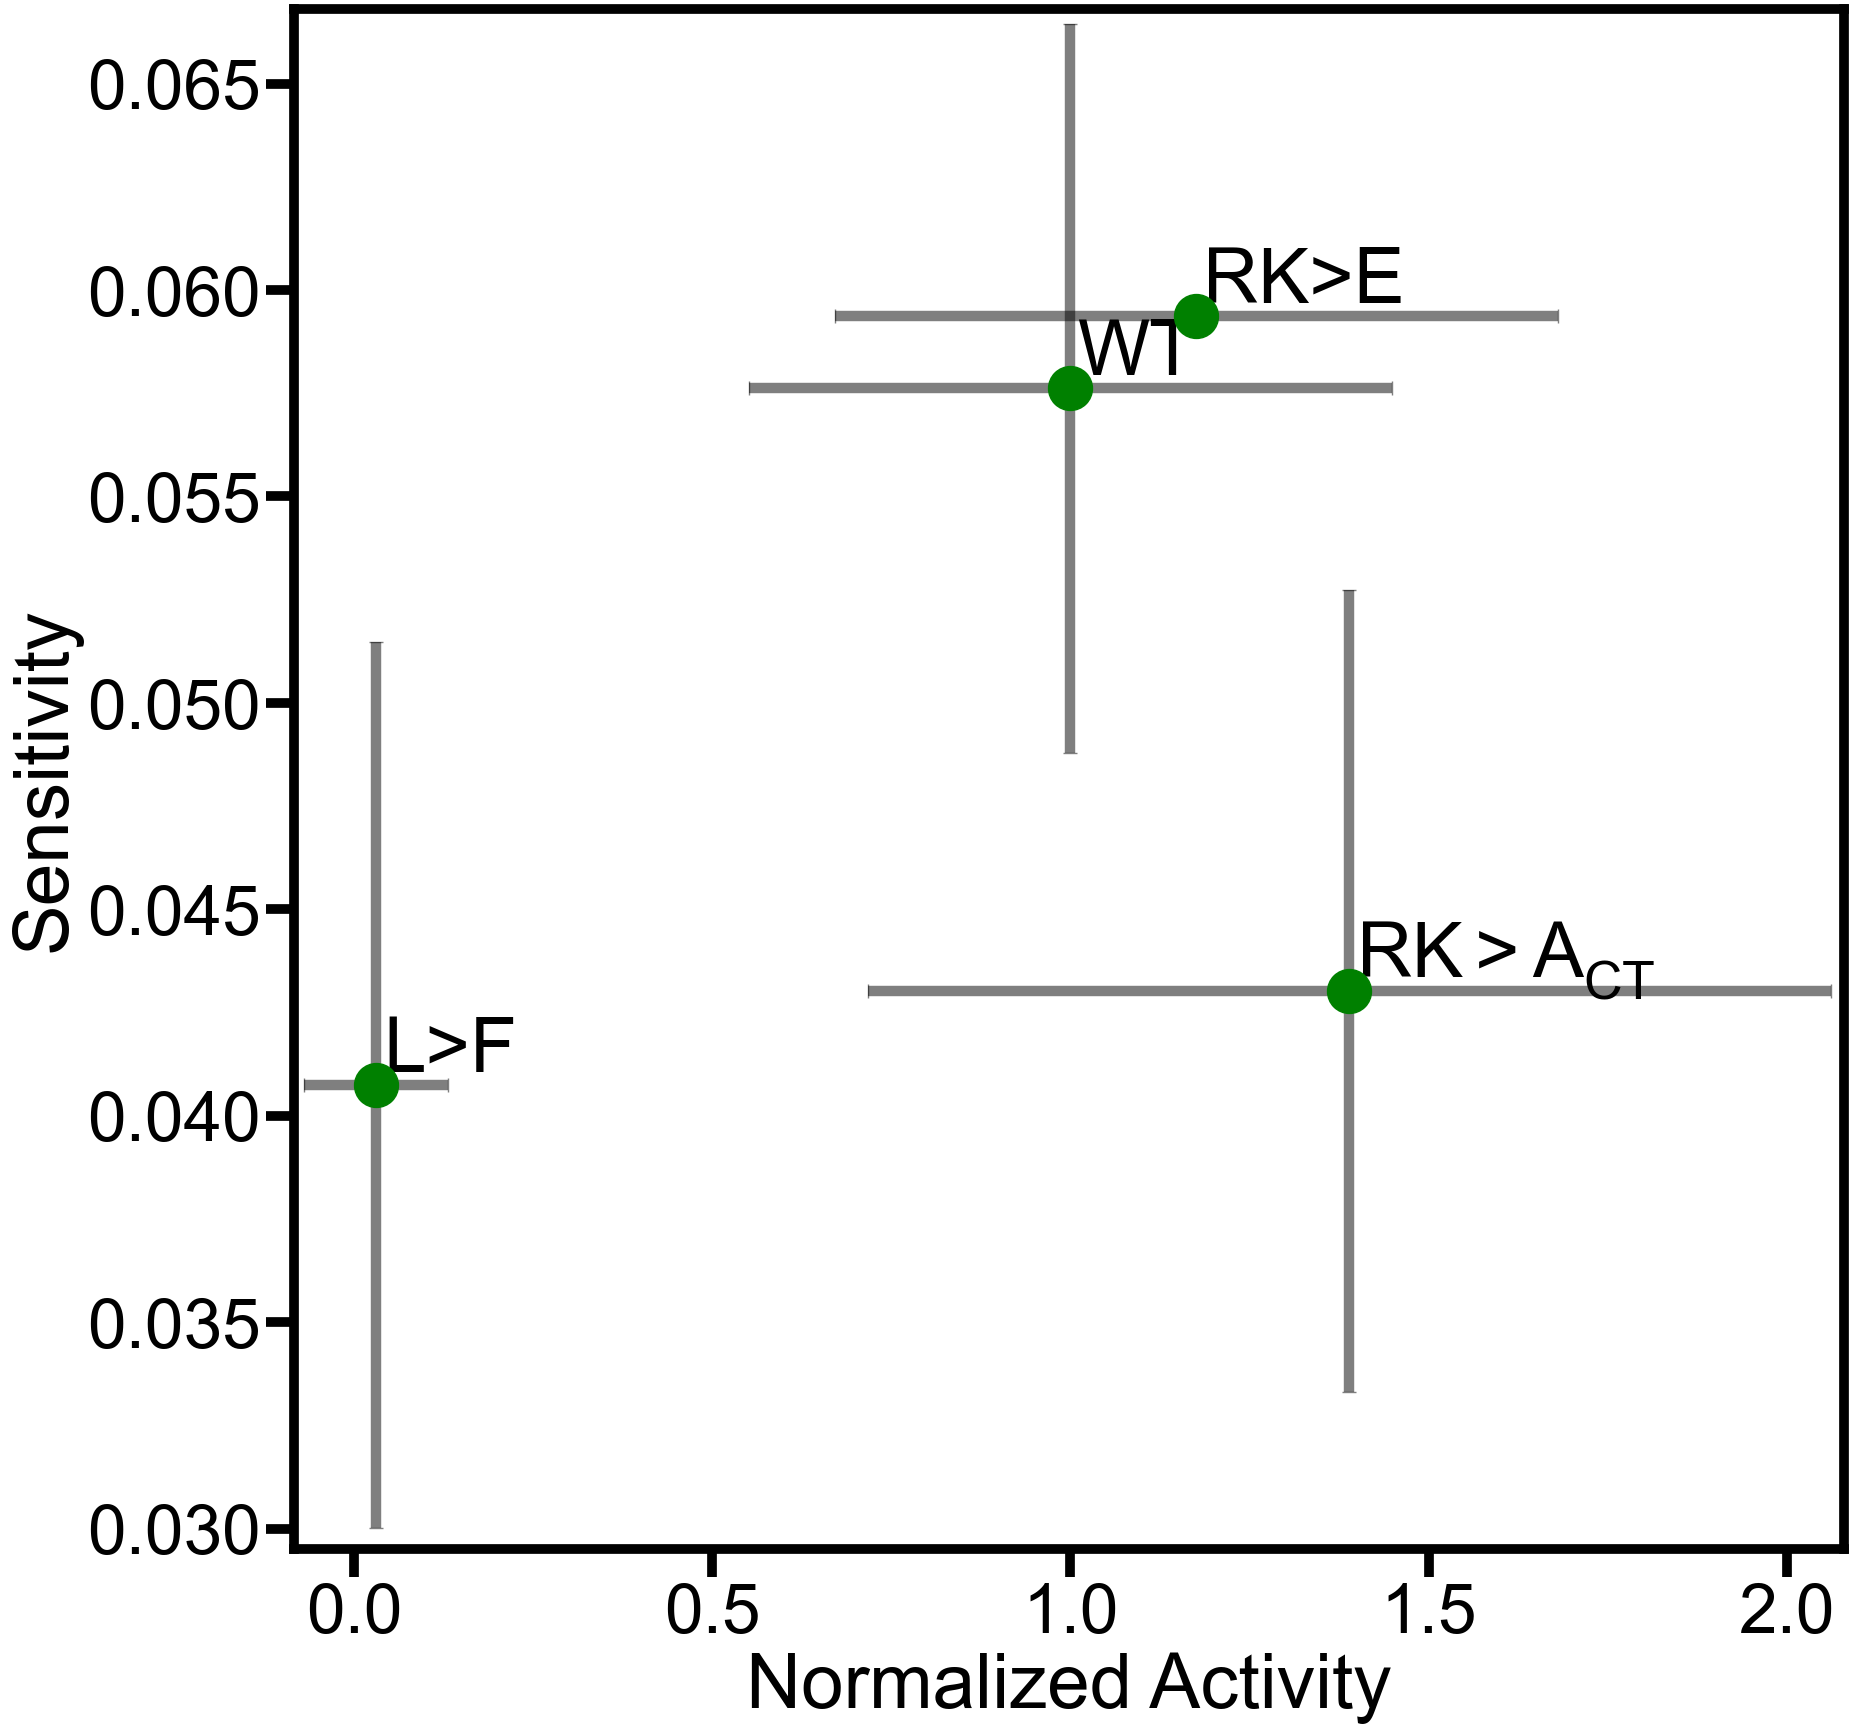

In [8]:
import matplotlib.pyplot as plt

# Assuming 'sensitivity' and 'activity' DataFrames are defined and 'GS24' has been removed from 'sensitivity'
# We will align the activity DataFrame to match the sensitivity DataFrame
activity_aligned = activity[activity['mut name'].isin(sensitivity['mut name'])].reset_index(drop=True)

# Create a figure and a subplots axis
fig, ax = plt.subplots(figsize=(20, 20))

# Generate the scatter plot with error bars
# Note that we need to set the 'ecolor' as a single value if we want to apply alpha
# Therefore, we'll plot the error bars in two steps to have them in different colors
# First plot the y-error (vertical) with the specified alpha
ax.errorbar(activity_aligned['normalized activity'], sensitivity['absolute difference'],
            yerr=sensitivity['propagated_SE'], fmt='o', color='black', alpha=0.5,
            ecolor='black', elinewidth=7.5, capsize=5)

# Then plot the x-error (horizontal) without alpha
ax.errorbar(activity_aligned['normalized activity'], sensitivity['absolute difference'],
            xerr=activity_aligned['normalized error'], fmt='o', color='black',
            ecolor='black', elinewidth=7.5, capsize=5, alpha=0.5)

# Increase the size of the scatter points
ax.scatter(activity_aligned['normalized activity'], sensitivity['absolute difference'],
           color='green', s=1000, zorder=4)  # `s` is the size of the scatter point

# Prepare to update x-axis labels, especially for the annotation
labels = [label if label != 'RK>Amut20to39' else 'RK$>A_{CT}$' for label in activity_aligned['mut name']]

# Label each scatter point with its updated 'mut name'
for i, label in enumerate(labels):
    ax.annotate(label,
                (activity_aligned['normalized activity'][i], sensitivity['absolute difference'][i]),
                textcoords="offset points", # how to position the text
                xytext=(5,10), # distance from text to points (x,y)
                ha='left',zorder=3) # horizontal alignment can be left, right or center

# Set axis labels
plt.xlabel('Normalized Activity')
plt.ylabel('Sensitivity')
plt.xlim(-.084, 2.08)
plt.ylim(0.0295, .0668)
# Display the plot
plt.show()
